In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/train.csv")
df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
data_types=df.dtypes
print(data_types)

missing_values = df.isna().sum()
print(missing_values)


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


<ipython-input-4-06bea06a8862>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


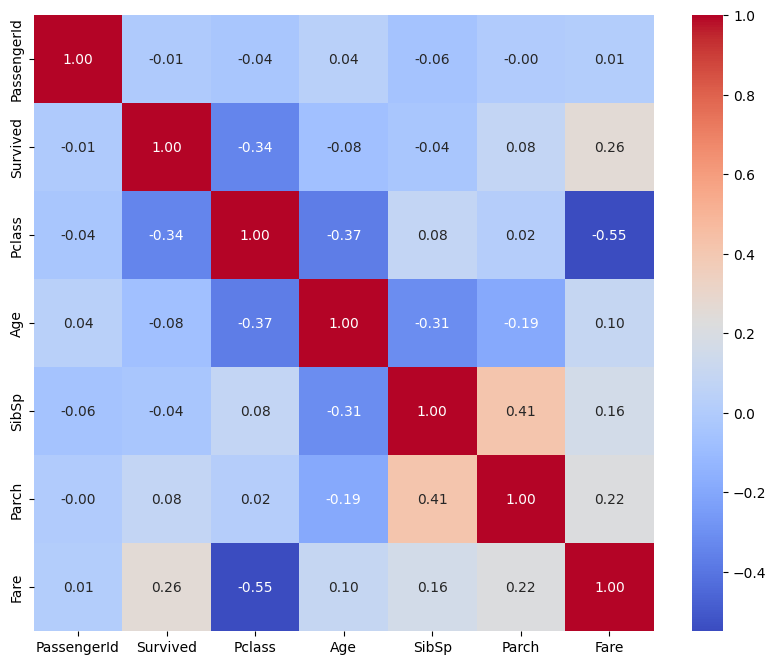

In [4]:
corr_matrix = df.corr()

# Set the size of the plot
plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Show the plot
plt.show()

In [5]:
tab1=pd.crosstab(df['Survived'], df['Sex'])
tab1


Sex,female,male
Survived,,
0,81,468
1,233,109


it looks like more females have survived than males. But the amount of male passengers are more in number.

In [6]:
tab2 = pd.crosstab(index=[df['Survived'], df['Pclass']], columns=df['Sex'])
print(tab2)


Sex              female  male
Survived Pclass              
0        1            3    77
         2            6    91
         3           72   300
1        1           91    45
         2           70    17
         3           72    47


most of the women who survived seem to belong to a higher socio economic class(1), while most of the men who didnt survive seem to belong to the lower classes. This indicates that socio economic status could be a factor in surviving the ship wreck.

In [7]:
tab2 = pd.crosstab(index=[df['Survived'], df['Sex']],
                  columns=df['SibSp']
                 )
print(tab2)



SibSp              0   1   2  3   4  5  8
Survived Sex                             
0        female   37  26   3  7   4  1  3
         male    361  71  12  5  11  4  4
1        female  137  80  10  4   2  0  0
         male     73  32   3  0   1  0  0


In [8]:
tab2 = pd.crosstab(index=[df['Survived'], df['Pclass']],
                  columns=df['Sex'],
                  values=df['Age'],
                  aggfunc='mean')
print(tab2)


Sex                 female       male
Survived Pclass                      
0        1       25.666667  44.581967
         2       36.000000  33.369048
         3       23.818182  27.255814
1        1       34.939024  36.248000
         2       28.080882  16.022000
         3       19.329787  22.274211


the women who survied seem to be in their 30s , the same goes for the men who survived as well

In [16]:
import statsmodels.api as sm


# Assuming 'Survived', 'Sex', 'Pclass', and 'Age' are columns in your DataFrame

# Convert categorical variables into one-hot encoding
df_encoded = pd.get_dummies(df, columns=['Sex', 'Pclass'], drop_first=True)

# Add a constant to the feature matrix (for intercept)
X = sm.add_constant(df_encoded[['Sex_male', 'Pclass_2', 'Pclass_3']])

# Fit the logistic regression model
model = sm.Logit(df['Survived'], X)
result = model.fit()

# Print the summary statistics
print(result.summary())



Optimization terminated successfully.
         Current function value: 0.464023
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      887
Method:                           MLE   Df Model:                            3
Date:                Wed, 11 Oct 2023   Pseudo R-squ.:                  0.3032
Time:                        09:29:10   Log-Likelihood:                -413.44
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 1.145e-77
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2971      0.219     10.490      0.000       1.868       2.726
Sex_male      -2.6419      0.

In [17]:

test_df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/test.csv")
# Convert categorical variables into one-hot encoding
test_encoded = pd.get_dummies(test_df, columns=['Sex', 'Pclass'], drop_first=True)

# Add a constant to the feature matrix (for intercept)
X_test = sm.add_constant(test_encoded[['Sex_male', 'Pclass_2', 'Pclass_3']])

# Predict survival probabilities
predicted_probabilities = result.predict(X_test)

# Round probabilities to get binary predictions (0 or 1)
predicted_survival = (predicted_probabilities > 0.5).astype(int)

# Add the PassengerId column to the predictions
predictions_with_id = pd.concat([test_df['PassengerId'], pd.Series(predicted_survival, name='Survived')], axis=1)

# Save predictions to a CSV file
predictions_with_id.to_csv('predictions.csv', index=False)


In [24]:
df_encoded = pd.get_dummies(df, columns=['Sex', 'Pclass'], drop_first=True)

# Step 3: Add a constant to the feature matrix (for intercept)
X = sm.add_constant(df_encoded[['Sex_male', 'Pclass_2', 'Pclass_3','SibSp']])

# Step 4: Fit the logistic regression model
model = sm.Logit(df['Survived'], X)
result = model.fit()

# Step 5: Print the summary statistics
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.459679
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      886
Method:                           MLE   Df Model:                            4
Date:                Wed, 11 Oct 2023   Pseudo R-squ.:                  0.3097
Time:                        09:49:36   Log-Likelihood:                -409.57
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 2.907e-78
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4659      0.231     10.664      0.000       2.013       2.919
Sex_male      -2.7412      0.

In [25]:
test_df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/test.csv")
# Convert categorical variables into one-hot encoding
test_encoded = pd.get_dummies(test_df, columns=['Sex', 'Pclass'], drop_first=True)

# Add a constant to the feature matrix (for intercept)
X_test = sm.add_constant(test_encoded[['Sex_male', 'Pclass_2', 'Pclass_3','SibSp']])

# Predict survival probabilities
predicted_probabilities = result.predict(X_test)

# Round probabilities to get binary predictions (0 or 1)
predicted_survival = (predicted_probabilities > 0.5).astype(int)

# Add the PassengerId column to the predictions
predictions_with_id = pd.concat([test_df['PassengerId'], pd.Series(predicted_survival, name='Survived')], axis=1)

# Save predictions to a CSV file
predictions_with_id.to_csv('predictions.csv', index=False)
